## Benourlli
Scrivere un esercizio che generi numeri random che seguano una distribuzione di Benourlli

In [1]:
import numpy as np

def bernoulli(p):
    x = np.random.rand()
    return 1 if x < p else 0
  
p = 1/2
n = 1000
x = np.array([bernoulli(p) for _ in range(n)])
#print(f'Sequenza causale: {x}')

successi = np.sum(x)
print(f'Numero di successi: {successi/n*100:.2f}%')

Numero di successi: 48.50%


In [2]:
x = np.random.binomial(1, p, n)

successi = np.sum(x)
print(f'Numero di successi: {successi/n*100:.2f}%')

Numero di successi: 50.30%


## Multinomiale
Scrivere un esercizio che generi numeri random che seguano una distribuzione di Multinomiale. 

[1/4, 1/2, 1/4]

Generare 2000 di questi numeri e costruire un'istogramma verificando l'accordo con la distribuzione teorica seguita

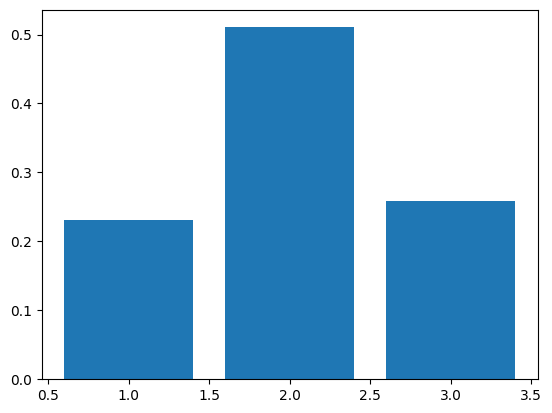

In [3]:
import matplotlib.pyplot as plt

def multinomiale(p):
    m = p.size
    F = np.cumsum(p)
    xi = np.random.rand()
    X = np.nonzero(xi < F)[0][0]+1 # restituisce gli indici degli elementi di F che soddisfano la condizione
    return X
    
n = 2000
p = np.array([1/4, 1/2, 1/4])    
x = np.array([multinomiale(p) for _ in range(n)])

m = p.size
F = np.zeros(m)
for i in range(m):
    F[i] = np.sum(x == i+1) # conta quante volte ciascun evento è stato campionato

x = np.arange(m)+1 # valori da 0 a m
F /= n

plt.bar(x, F)
plt.show()

## Uniforme
Generare numeri random con distribuzione uniforme in AB. Verificare che sia invertibile con un istogramma

Densità teorica:[0.5 0.5 0.5 ... 0.5 0.5 0.5]


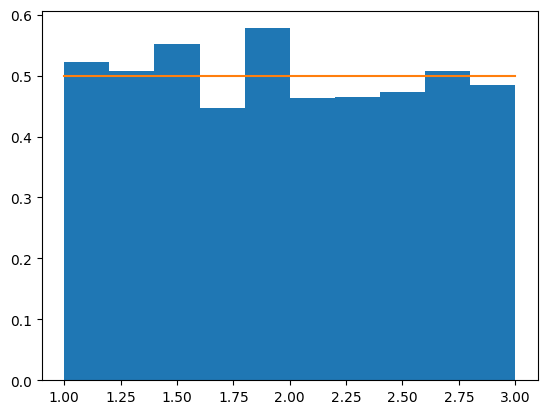

In [4]:
from scipy.stats import probplot, uniform

a = 1
b = 3
n = 2000
x = np.random.rand(n) # genero n campioni random

y = a + x * (b-a) # seguono una legge uniforme
p = uniform.pdf(y, a, b-a) # oppure p = 1/(b-a)
print(f'Densità teorica:{p}')

xx = np.linspace(a, b, 1000)
yy = uniform.pdf(xx, a, b-a)

plt.hist(y, density=True)
plt.plot(xx, yy)

plt.show()

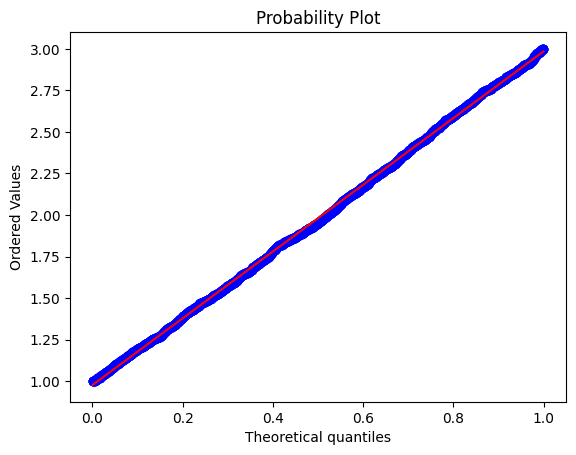

In [5]:
fig, ax = plt.subplots(1,1)
probplot(y, dist=uniform, plot=ax)
plt.show()

## Esponenziale
Generare numeri random con distribuzione esponenziale di parametro Lambda, Verificare che sia invertibile con un istogramma

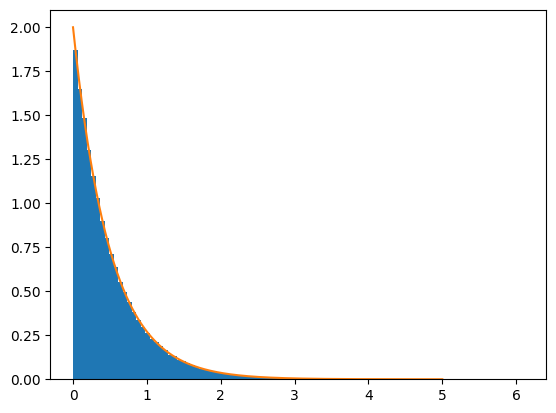

In [6]:
from scipy.stats import expon

lam = 2
n = 200000
x = np.random.rand(n)

y = -np.log(x)/lam # seguono una legge esponenziale

xx = np.linspace(0, 5, n)
yy = expon.pdf(xx, scale=1/lam) # andamento teorico

plt.hist(y, bins=100, density=True)
plt.plot(xx, yy)

plt.show()

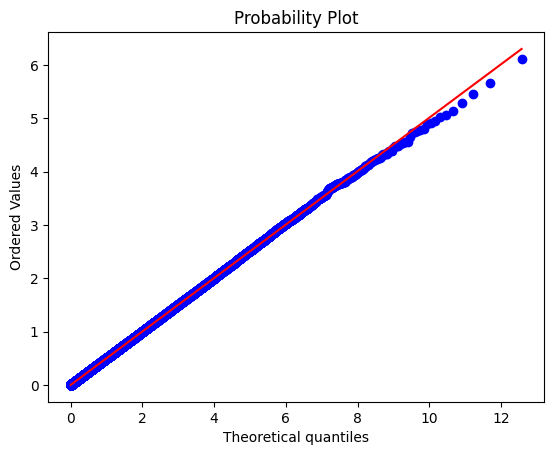

In [7]:
fig, ax = plt.subplots(1,1)
probplot(y, dist=expon, plot=ax)
plt.show()

## Normale

Generare numeri random con distribuzione normale. Verificare che sia invertibile con un istogramma

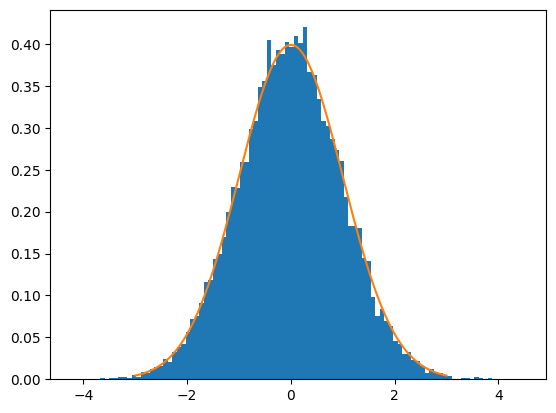

In [8]:
from scipy.stats import norm

n = 20000
x = np.random.rand(n)

# Divido in due insiemi da n/2 i numeri random generati
xi1 = x[0:int(n/2)]
xi2 = x[int(n/2): n]

eta1 = np.sqrt(-2*np.log(xi1))*np.cos(2*np.pi*xi2)
eta2 = np.sqrt(-2*np.log(xi1))*np.sin(2*np.pi*xi2)

mu = 0
sig = 1

xx = np.linspace(-3*sig, 3*sig, 1000)
yy = norm.pdf(xx, mu, sig)
y = np.concatenate((eta1, eta2))

plt.hist(y, bins=100, density=True)
plt.plot(xx, yy)

plt.show()

## Generare sequenze di numeri random che seguano le seguenti distribuzioni note :
- U([-1, 1])
- EXP(3)
- N(1, 2)
- Chi2(5)

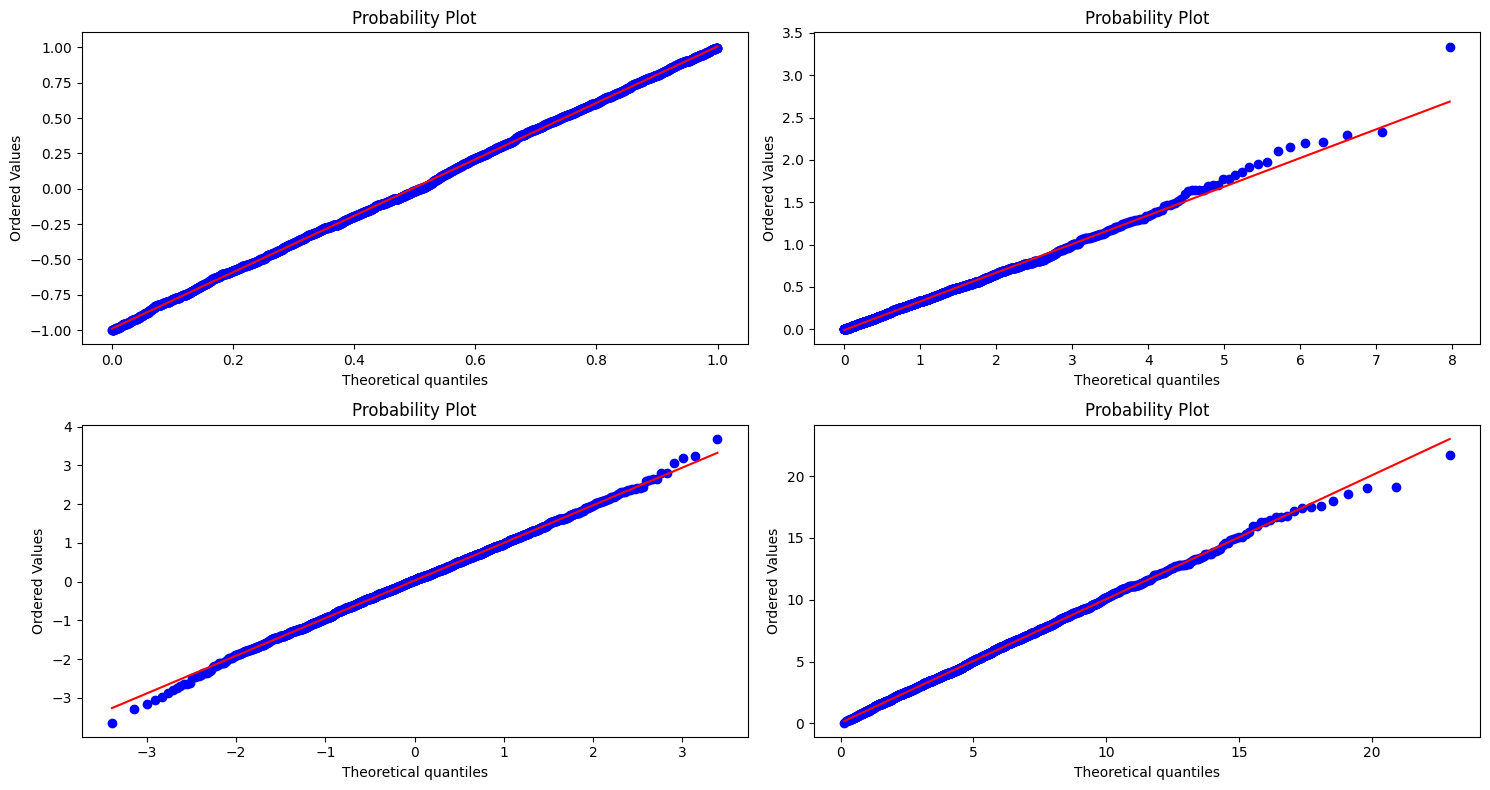

In [9]:
from scipy.stats import chi2

n = 2000

# Uniforme
a, b = -1, 1
x = np.random.rand(n)
y1 = a + x * (b-a) # uniforme

# Esponenziale
lam = 3
y2 = - np.log(x)/lam # esponenziale

# Normale
xi1 = x[0:int(n/2)]
xi2 = x[int(n/2): n]

eta1 = np.sqrt(-2*np.log(xi1))*np.cos(2*np.pi*xi2)
eta2 = np.sqrt(-2*np.log(xi1))*np.sin(2*np.pi*xi2)

mu = 0
sig = 1
y3 = np.concatenate((eta1, eta2)) # normale

# Chi2
y4 = chi2.ppf(x, df=5)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
ax1, ax2, ax3, ax4 = axs.flatten()

ax1.set_title("Legge Uniforme")
probplot(y1, dist='uniform', plot=ax1)

ax2.set_title("Legge Esponenziale")
probplot(y2, dist='expon', plot=ax2)

ax3.set_title("Legge Normale")
probplot(y3, dist='norm', plot=ax3)

ax4.set_title("Legge Chi2")
probplot(y4, dist='chi2', sparams=5, plot=ax4)  # sparams per i gradi di libertà

plt.tight_layout()
plt.show()

## Generare numeri pseudocasuali con distribuzione f(x) = (1+cos x)/2Pigreco

Tempo computazionale: 1.68 secondi


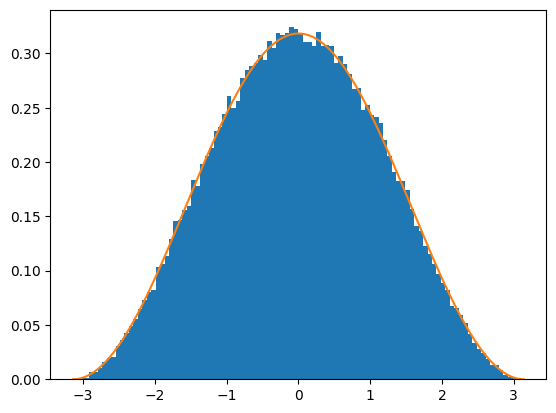

In [17]:
import time

def f(x):
    return (1 + np.cos(x)) / (2 * np.pi)

def rigetto(a, b, M):
    while True:
        r1 = np.random.rand()
        r2 = np.random.rand()
        xi = a + r1 * (b - a) # uniforme in [a, b]
        eta = M * r2 
        if eta <= f(xi):
            break
    return xi

a = -np.pi
b = np.pi
n = 100000
M = 1 / np.pi # punto di massimo di f(x)

start_time = time.time()  # Registra il tempo di inizio

x = np.array([rigetto(a, b, M) for _ in range(n)])

end_time = time.time()  # Registra il tempo di fine
elapsed_time = end_time - start_time
print(f"Tempo computazionale: {elapsed_time:.2f} secondi")

xx = np.linspace(a, b, 1000)
yy = f(xx)

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=100, density=True)
plt.plot(xx, yy)
plt.show()

Tempo computazionale: 8.12 secondi


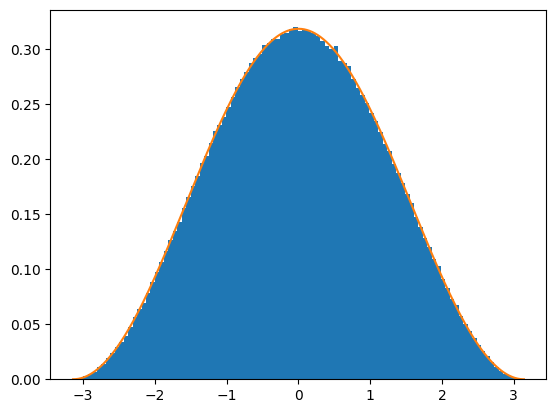

In [11]:
n = 1000000
M = 1 / np.pi # punto di massimo di f(x)

start_time = time.time()  # Registra il tempo di inizio

x = np.array([rigetto(a, b, M) for _ in range(n)])

end_time = time.time()  # Registra il tempo di fine
elapsed_time = end_time - start_time
print(f"Tempo computazionale: {elapsed_time:.2f} secondi")

xx = np.linspace(a, b, 1000)
yy = f(xx)

fig, ax = plt.subplots(1, 1)
ax.hist(x, bins=100, density=True)
plt.plot(xx, yy)
plt.show()

# Monte Carlo

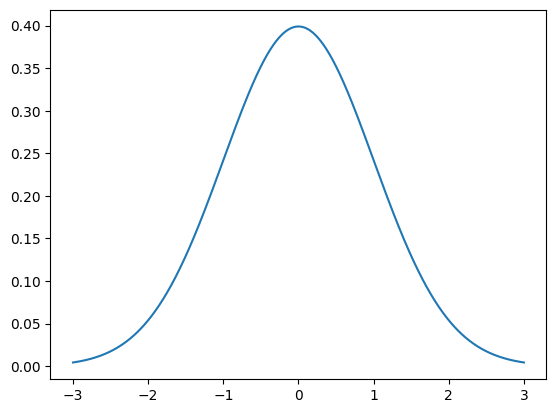

In [12]:
def fun(x):
    y = np.exp(-x**2/2)/np.sqrt(2*np.pi)
    return y

a = 0.5
b = 2

xx = np.linspace(-3, 3, 1000)
yy = norm.pdf(xx)
plt.plot(xx, yy)
plt.show()

In [13]:
M = 0.45 # preso dal grafico
n = 100000
ns = 0 # numero di hit
for i in range(n):
    r1 = np.random.rand()
    r2 = np.random.rand()
    xi = a + r1*(b-a)
    eta = r2*M
    if f(xi) <= eta:
        ns += 1

p = ns/n
I = p*M*(b-a)
I

0.3685095

In [14]:
phi = norm.cdf(b)-norm.cdf(a)
phi

0.2857874067778077